In [1]:
import numpy as np
import DNN_model as dnn 

In [4]:
m_train = 1000
m_test = 200
n_x = 1000
x_train = np.random.rand(n_x, m_train)
x_test = np.random.rand(n_x, m_test)

# layer_dims is the number of nodes in each layer, NOT including the input layers
# layers_dims = [25, 7, 5, 1] 
# this would be a DNN of n_X -> 25 -> 7 -> 5 -> 1
# if number of nodes in last layer is > 1, we expect a multi class output
layer_dims = [10, 1] 
isBinary = layer_dims[-1] <= 2 

if isBinary:
    assert(layer_dims[-1] == 1)
    y_train = np.random.randint(2, size=(1, m_train))
    y_test = np.random.randint(2, size=(1, m_test))
else:
    # Multi class
    assert(layer_dims[-1] > 1)
    y_train = np.random.randint(layer_dims[-1], size=(1, m_train))[0]
    y_train = dnn.one_hot_matrix(y_train, layer_dims[-1], axis = 0)
    
    y_test = np.random.randint(layer_dims[-1], size=(1, m_test))[0]
    y_test = dnn.one_hot_matrix(y_test, layer_dims[-1], axis = 0)

Cost after epoch 0: 0.756232
Cost after epoch 100: 0.531811
Cost after epoch 200: 0.321142
Cost after epoch 300: 0.197874
Cost after epoch 400: 0.117911
Cost after epoch 500: 0.070774
Cost after epoch 600: 0.041300
Cost after epoch 700: 0.025617
Cost after epoch 800: 0.015958
Cost after epoch 900: 0.010719


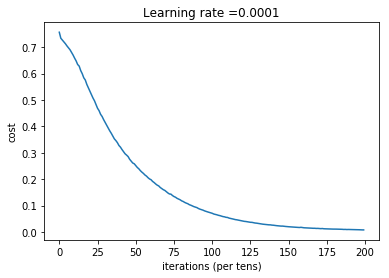

Parameters have been trained!
('Train Accuracy:', 1.0)
('Test Accuracy:', 0.56)
[[ 0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.
   0.  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.
   1.  0.  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  1.
   1.  1.  1.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.
   0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.  0.  0.
   1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  1.  1.
   1.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.  0.  0.  0.  0.  1.  1.  0.
   1.  0.  0.  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.
   1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  0.  1.  0.
   0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.
   1.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.
   0.  0.  1.  0.  0.  0.  1.  1

In [5]:
parameters = dnn.train(x_train, y_train, x_test, y_test, layer_dims, keep_prob=1.0, num_epochs=1000)
prediction = dnn.predict(x_train, parameters, isBinary)
print prediction